<a href="https://colab.research.google.com/github/jpthirumalai/aiml/blob/master/Balanced_trainset_VGG16_TF_Pneumonia_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import re
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Device:', tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except:
    strategy = tf.distribute.get_strategy()
print('Number of replicas:', strategy.num_replicas_in_sync)
# use the link for TPU troubleshooting https://cloud.google.com/tpu/docs/troubleshooting

Device: grpc://10.63.158.10:8470
INFO:tensorflow:Initializing the TPU system: grpc://10.63.158.10:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.63.158.10:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Number of replicas: 8


In [3]:
print(tf.__version__)

2.2.0


In [4]:
#drive.flush_and_unmount()

In [5]:
# !fusermount -u drive
# !google-drive-ocamlfuse drive

In [6]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
#check present working directory
cwd = !pwd
print("Current folder: ",cwd)
# %cd '/content/drive/My Drive/AIML/AI/rsnadata/'  #changing as mount subfolder causing issue AIML/AI/rsnadata/
%cd '/content/drive/My Drive'
cwd = !pwd
print("Current working directory after seting proj folder: ",cwd)

Current folder:  ['/content']
/content/drive/My Drive
Current working directory after seting proj folder:  ['/content/drive/My Drive']


In [8]:
from google.colab import auth
auth.authenticate_user()
project_id = 'thirumlai'
!gcloud config set project {project_id}
!gsutil ls

Updated property [core/project].
gs://thirumlai/


In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 16 * strategy.num_replicas_in_sync
GCS_PATH = 'gs://thirumlai'       #cwd[0] #/content/drive/My Drive
IMAGE_SIZE = [224, 224]
EPOCHS = 25

In [10]:
GCS_PATH

'gs://thirumlai'

In [11]:
filenames = tf.io.gfile.glob(str(GCS_PATH + '/positive/*'))
filenames.extend(tf.io.gfile.glob(str(GCS_PATH +'/normal/*')))

train_filenames, val_filenames = train_test_split(filenames, test_size=0.2)

In [12]:
len(filenames)

26151

In [13]:
print('trainset size {} and validation test size {}'.format(len(train_filenames),len(val_filenames)))

trainset size 20920 and validation test size 5231


In [14]:
COUNT_NORMAL = len([filename for filename in train_filenames if "normal" in filename])
print("Normal images count in training set: " + str(COUNT_NORMAL))

COUNT_PNEUMONIA = len([filename for filename in train_filenames if "positive" in filename])
print("Pneumonia images count in training set: " + str(COUNT_PNEUMONIA))
# Normal images count in training set: 16205
# Pneumonia images count in training set: 4716

Normal images count in training set: 16193
Pneumonia images count in training set: 4727


In [15]:
train_list_ds = tf.data.Dataset.from_tensor_slices(train_filenames)
val_list_ds = tf.data.Dataset.from_tensor_slices(val_filenames)

for f in train_list_ds.take(5):
    print(f.numpy())

b'gs://thirumlai/positive/00f08de1-517e-4652-a04f-d1dc9ee48593.jpg'
b'gs://thirumlai/positive/c4acd677-ae5e-4b23-b888-2e8e2e1c3996.jpg'
b'gs://thirumlai/normal/4d375ca5-64c8-45bc-a019-764c042a3598.png'
b'gs://thirumlai/normal/dec13d78-ab5e-43c4-86f9-1567c18b8a4e.png'
b'gs://thirumlai/normal/ca5562f7-66a9-4ca7-ac19-1d8d738e3155.png'


In [16]:
TRAIN_IMG_COUNT = tf.data.experimental.cardinality(train_list_ds).numpy()
print("Training images count: " + str(TRAIN_IMG_COUNT))

VAL_IMG_COUNT = tf.data.experimental.cardinality(val_list_ds).numpy()
print("Validating images count: " + str(VAL_IMG_COUNT))

Training images count: 20920
Validating images count: 5231


In [17]:
def get_label(file_path):
    # convert the path to a list of path components
    parts = tf.strings.split(file_path, os.path.sep)
    # The second to last is the class-directory
    return parts[-2] == "positive"

In [18]:
def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # resize the image to the desired size.
  return tf.image.resize(img, IMAGE_SIZE)

In [19]:
def process_path(file_path):
    label = get_label(file_path)
    # load the raw data from the file as a string
    img = tf.io.read_file(file_path)
    img = decode_img(img)
    return img, label

In [20]:
train_ds = train_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [21]:
for image, label in train_ds.take(1):
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.numpy())

Image shape:  (224, 224, 3)
Label:  True


In [22]:
def prepare_for_training(ds, cache=True, shuffle_buffer_size=1000):
    # This is a small dataset, only load it once, and keep it in memory.
    # use `.cache(filename)` to cache preprocessing work for datasets that don't
    # fit in memory.
    if cache:
        if isinstance(cache, str):
            ds = ds.cache(cache)
        else:
            ds = ds.cache()

    ds = ds.shuffle(buffer_size=shuffle_buffer_size)

    # Repeat forever
    ds = ds.repeat()

    ds = ds.batch(BATCH_SIZE)

    # `prefetch` lets the dataset fetch batches in the background while the model
    # is training.
    ds = ds.prefetch(buffer_size=AUTOTUNE)

    return ds

In [24]:
train_ds = prepare_for_training(train_ds)
val_ds = prepare_for_training(val_ds)

image_batch, label_batch = next(iter(train_ds))

In [25]:
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(16):
        ax = plt.subplot(4,4,n+1)
        plt.imshow(image_batch[n])
        if label_batch[n]:
            plt.title("PNEUMONIA")
        else:
            plt.title("NORMAL")
        plt.axis("off")

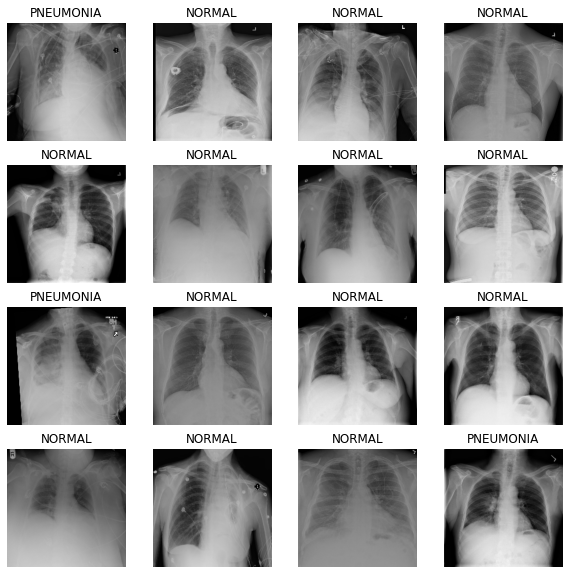

In [26]:
show_batch(image_batch.numpy(), label_batch.numpy())

In [27]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import Model
import tensorflow as tf

no_classes = 1
def build_model():
  base_model = VGG16(include_top=False,
                    input_shape = (IMAGE_SIZE[0], IMAGE_SIZE[1],3), weights = 'imagenet')

  for layer in base_model.layers[:-12]:
      layer.trainable = False
      
  for layer in base_model.layers:
      print(layer,layer.trainable)

  # model = tf.keras.Sequential()
  # model.add(base_model)
  # model.add(tf.keras.layers.Flatten())
  # model.add(tf.keras.layers.Dense(1024,activation='relu'))
  # model.add(tf.keras.layers.Dense(512,activation='relu'))
  # model.add(tf.keras.layers.Dense(no_classes,activation='sigmoid')) 
  gap = tf.keras.layers.GlobalAveragePooling2D(name='gap')(base_model.layers[-2].output)
  d1 = tf.keras.layers.Dense(units=1024, activation='relu', name='d1')(gap)
  do1 = tf.keras.layers.Dropout(rate=0.5, name='do1')(d1)
  d2 = tf.keras.layers.Dense(units=512, activation='relu', name='d2')(do1)
  do2 =  tf.keras.layers.Dropout(rate=0.5, name='do2')(d2)
  output = tf.keras.layers.Dense(units=1, activation='sigmoid', name='pred')(do2)
  classifier = Model(inputs=base_model.input, outputs=output)

  return classifier

In [28]:
# myadam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
opt_sgd = tf.keras.optimizers.SGD(lr=1e-4,momentum=0.95)

In [29]:
with strategy.scope():
    model = build_model()

    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    
    model.compile(
        optimizer=opt_sgd,
        loss='binary_crossentropy',
        metrics=METRICS
    )

58892288/58889256 [==============================] - 1s 0us/step
<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f3e3163f978> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f3e31aef208> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f3e3165aac8> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f3e2fe18278> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f3e2fe18128> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f3e2fe20d68> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f3e2fe2e6a0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f3e2fe2e860> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f3e2fe38400> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f3e2fdc4c50> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f3e2fdd0550> True
<t

In [30]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [31]:
import math

In [32]:
weight_for_0 = (1 / COUNT_NORMAL)*(TRAIN_IMG_COUNT)/2.0 
weight_for_1 = (1 / COUNT_PNEUMONIA)*(TRAIN_IMG_COUNT)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.65
Weight for class 1: 2.21


In [33]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(0.01, 20)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)

In [34]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("thirumlai_pneumonia_vgg16v3_weights.h5", save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,monitor='val_loss',min_delta=0.001, restore_best_weights=True)

In [35]:
history = model.fit(
    train_ds,
    steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
    epochs=100,
    validation_data=val_ds,
    class_weight = class_weight,
    validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
    callbacks=[checkpoint_cb, early_stopping_cb, lr_scheduler]
)

Epoch 1/100
 11/163 [=>............................] - ETA: 8:19 - loss: 0.7068 - recall: 0.4833 - accuracy: 0.5376 - precision: 0.2262

KeyboardInterrupt: ignored

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

The plot depicts the clear case of overfitting. Working on data imbalance, about to consider around 4.7 k of normal case only.

In [93]:
fikfilenames = None
fikfilenames = tf.io.gfile.glob(str(GCS_PATH + '/normal/*'))
fikfilenames = fikfilenames[:5000]
print(len(fikfilenames))
# fikfilenames[:5]
fikfilenames.extend(tf.io.gfile.glob(str(GCS_PATH +'/positive/*')))
fiktrain_filenames, fikval_filenames = train_test_split(fikfilenames, test_size=0.2)

5000


In [94]:
len(fikfilenames)

10893

In [95]:
print("No of Validataion set {} No of Train set{}".format(len(fikval_filenames),len(fiktrain_filenames)))

No of Validataion set 2179 No of Train set8714


In [96]:
COUNT_NORMAL = len([filename for filename in fiktrain_filenames if "normal" in filename])
print("Normal images count in training set: " + str(COUNT_NORMAL))

COUNT_PNEUMONIA = len([filename for filename in fiktrain_filenames if "positive" in filename])
print("Pneumonia images count in training set: " + str(COUNT_PNEUMONIA))

Normal images count in training set: 3980
Pneumonia images count in training set: 4734


In [97]:
fiktrain_list_ds = tf.data.Dataset.from_tensor_slices(fiktrain_filenames)
fikval_list_ds = tf.data.Dataset.from_tensor_slices(fikval_filenames)

for f in fiktrain_list_ds.take(5):
    print(f.numpy())

b'gs://thirumlai/positive/335d17b1-bdfb-4939-9dc9-fa93f09648eb.jpg'
b'gs://thirumlai/normal/397ddee4-1cf5-468d-99ee-0da97306e2f4.png'
b'gs://thirumlai/normal/070efe1f-2b7a-4585-9e9b-561a4432fa57.png'
b'gs://thirumlai/positive/ad233e1a-853b-4ad8-951f-a756c3cf2d53.jpg'
b'gs://thirumlai/normal/45be6d94-a6e9-4c26-9738-d389764166de.png'


In [98]:
TRAIN_IMG_COUNT = tf.data.experimental.cardinality(fiktrain_list_ds).numpy()
print("Training images count: " + str(TRAIN_IMG_COUNT))

VAL_IMG_COUNT = tf.data.experimental.cardinality(fikval_list_ds).numpy()
print("Validating images count: " + str(VAL_IMG_COUNT))

Training images count: 8714
Validating images count: 2179


In [99]:
fiktrain_ds = train_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
fikval_ds = val_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [100]:
fiktrain_ds = prepare_for_training(fiktrain_ds)
fikval_ds = prepare_for_training(fikval_ds)

fikimage_batch, fiklabel_batch = next(iter(fiktrain_ds))

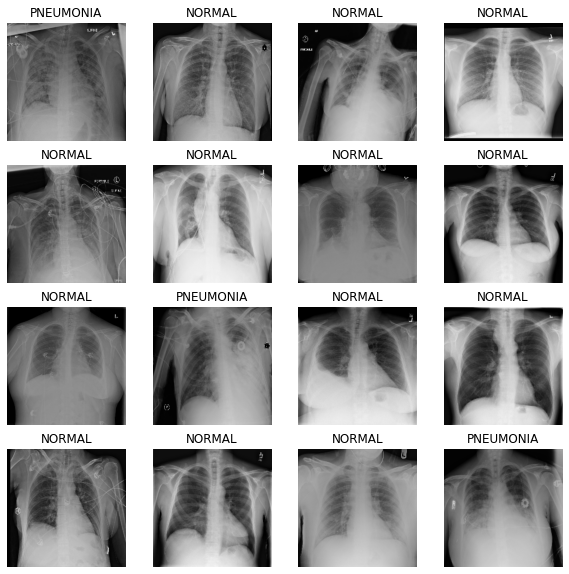

In [101]:
show_batch(fikimage_batch.numpy(), fiklabel_batch.numpy())

In [103]:
fikcheckpoint_cb = tf.keras.callbacks.ModelCheckpoint("thirumlai_pneumonia_vgg16v4_balanced_weights.h5", save_best_only=True)
fikearly_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,monitor='val_loss',min_delta=0.001, restore_best_weights=True)

In [104]:
history = model.fit(
    fiktrain_ds,
    steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
    epochs=100,
    validation_data=fikval_ds,
    class_weight = class_weight,
    validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
    callbacks=[fikcheckpoint_cb, fikearly_stopping_cb, lr_scheduler]
)

Epoch 1/100
68/68 [==============================] - 419s 6s/step - loss: 0.6010 - recall: 0.7019 - accuracy: 0.6685 - precision: 0.3715 - val_loss: 0.6731 - val_recall: 0.8692 - val_accuracy: 0.6365 - val_precision: 0.3488 - lr: 0.0100
Epoch 2/100
68/68 [==============================] - 403s 6s/step - loss: 0.5384 - recall: 0.7545 - accuracy: 0.7332 - precision: 0.4440 - val_loss: 0.4384 - val_recall: 0.6561 - val_accuracy: 0.8033 - val_precision: 0.5399 - lr: 0.0089
Epoch 3/100
68/68 [==============================] - 138s 2s/step - loss: 0.5318 - recall: 0.7729 - accuracy: 0.7374 - precision: 0.4595 - val_loss: 0.7141 - val_recall: 0.9192 - val_accuracy: 0.6268 - val_precision: 0.3520 - lr: 0.0079
Epoch 4/100
68/68 [==============================] - 85s 1s/step - loss: 0.5305 - recall: 0.7558 - accuracy: 0.7355 - precision: 0.4459 - val_loss: 0.4721 - val_recall: 0.7434 - val_accuracy: 0.7812 - val_precision: 0.4828 - lr: 0.0071
Epoch 5/100
68/68 [==============================] - 

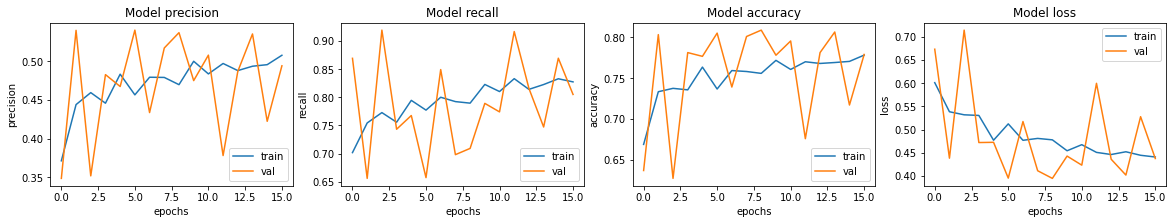

In [106]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])